# Introduction

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('dataset/marketing_campaign.csv')

## Dataset Description

The dataset contains the following attributes:

### People

- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years

### Promotion

- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month

# Data Cleaning and feature engineering

In [6]:
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeat

In [8]:
#df['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'].iloc[0]
#create a new column with name from the column names that are separated by \t
columns = df.columns[0].split('\t')
#loop through the columns string names
column_number = 0
for column in columns:
    #create a new column with the current name of the string
    row_values = []
    for i in range(len(df)):
        row_values.append(df['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'].iloc[i].split('\t')[column_number])
    column_number += 1
    df[column] = row_values
    #fill the new column with the values from the main column that are separated by \t but with the value that belong to it
#drop the main column
df.drop(columns=['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'], inplace=True)

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
#show all the column of the df
pd.set_option('display.max_columns', None)

In [11]:
#check for null values
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
#check for duplicates
df.duplicated().sum()

0

In [13]:
#drop Z_CostContact and Z_Revenue columns
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)


In [14]:
#check for the data types
df.dtypes

ID                     object
Year_Birth             object
Education              object
Marital_Status         object
Income                 object
Kidhome                object
Teenhome               object
Dt_Customer            object
Recency                object
MntWines               object
MntFruits              object
MntMeatProducts        object
MntFishProducts        object
MntSweetProducts       object
MntGoldProds           object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Response               object
dtype: object

In [15]:
df['Income'] = df['Income'].replace('', np.nan)  # replace empty strings with NaN
df['Income'] = df['Income'].fillna(0)  # fill NaN values with 0

In [16]:
# List of columns to convert to 'int64'
int_cols = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 
            'Response','Income']

# Convert columns to 'int64'
for col in int_cols:
    df[col] = df[col].astype('int64')

# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# List of columns to convert to 'string'
str_cols = ['Education', 'ID']

# Convert columns to 'string'
for col in str_cols:
    df[col] = df[col].astype('string')

In [17]:
#feature about the number of days since the customer joined

# Get the latest date in 'Dt_Customer'
latest_date = df['Dt_Customer'].max()

# Calculate the number of days since each customer joined
df['Days_Since_Joined'] = (latest_date - df['Dt_Customer']).dt.days

In [18]:
#feature with the age of the customer
df['Age'] = latest_date.year - df['Year_Birth']

In [19]:
#feature with the total spending of the customer
df['Total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [20]:
#featue with the total number of childeren in the household
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [21]:
#feature with the total number of purchases
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [22]:
#feature with the total number of accepted campaigns divided by the total number of campaigns mulitplied by 100
df['Total_Accepted_Campaigns'] = (df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']+ df['Response'])

In [23]:
#Customer Lifetime Value 
#estimation of CLV based on income, total spending,
#and customer engagement metrics. This is a more complex feature 
#but can be very valuable.



In [24]:
# organize the columns
# Define the new order of the columns
column_order = ['ID', 'Year_Birth', 'Age', 'Education', 'Marital_Status', 'Income', 
                'Kidhome', 'Teenhome', 'Total_Children', 'Dt_Customer', 'Days_Since_Joined', 
                 'Recency', 'Complain', 
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                'MntSweetProducts', 'MntGoldProds', 'Total_spending', 
                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                'NumStorePurchases', 'Total_Purchases', 'NumWebVisitsMonth', 
                'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                'AcceptedCmp5', 'Response', 'Total_Accepted_Campaigns']

# Reorder the columns
df = df[column_order]

In [25]:
#renaming the columns to make them more readable
df.rename(columns={
    'ID': 'CustomerID',
    'Year_Birth': 'BirthYear',
    'Dt_Customer': 'EnrollmentDate',
    'Kidhome': 'NumberOfKidsAtHome',
    'Teenhome': 'NumberOfTeensAtHome',
    'Total_Children': 'TotalNumberOfChildren',
    'Days_Since_Joined': 'DaysSinceEnrollment',
    'MntWines': 'AmountSpentOnWines',
    'MntFruits': 'AmountSpentOnFruits',
    'MntMeatProducts': 'AmountSpentOnMeat',
    'MntFishProducts': 'AmountSpentOnFish',
    'MntSweetProducts': 'AmountSpentOnSweets',
    'MntGoldProds': 'AmountSpentOnGold',
    'Total_spending': 'TotalSpending',
    'NumDealsPurchases': 'NumberOfDealsPurchases',
    'NumWebPurchases': 'NumberOfWebPurchases',
    'NumCatalogPurchases': 'NumberOfCatalogPurchases',
    'NumStorePurchases': 'NumberOfStorePurchases',
    'Total_Purchases': 'TotalNumberOfPurchases',
    'NumWebVisitsMonth': 'NumberOfWebVisitsPerMonth',
    'AcceptedCmp1': 'AcceptedCampaign1',
    'AcceptedCmp2': 'AcceptedCampaign2',
    'AcceptedCmp3': 'AcceptedCampaign3',
    'AcceptedCmp4': 'AcceptedCampaign4',
    'AcceptedCmp5': 'AcceptedCampaign5',
    'Response': 'AcceptedLastCampaign',
    'Total_Accepted_Campaigns': 'TotalAcceptedCampaigns',
    'Complain': 'HasComplained'
}, inplace=True)

Int64Index([], dtype='int64')


<AxesSubplot: xlabel='Age'>

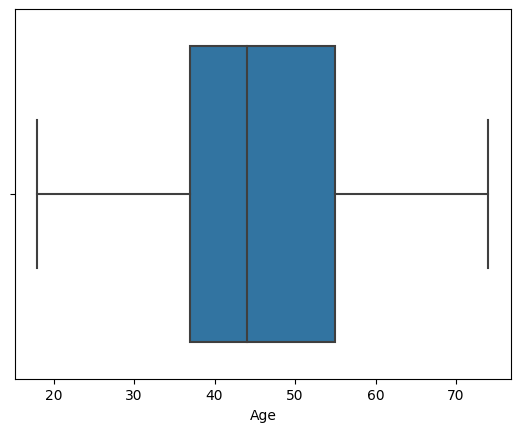

In [26]:
# Keep only the rows where 'Age' is less than or equal to 80
df = df[df['Age'] <= 80]

# Now, print the indices of any rows where 'Age' is still greater than 80 (should be empty)
print(df[df['Age'] > 80].index)

# Check the outliers of the 'Age' feature
sns.boxplot(x=df['Age'])

In [27]:
#save the cleaned data
df.to_csv('dataset/marketing_campaign_cleaned.csv', index=False)

# Exploratory Data Analysis 

## Descriptive Statistics Insights

In [28]:
#statistical summary of the data
df.describe()

,BirthYear,Age,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,DaysSinceEnrollment,Recency,HasComplained,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,1968.901654,45.098346,51676.153330,0.444345,0.506482,0.950827,353.790344,49.104604,0.008941,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,605.743406,2.326777,4.087170,2.662494,5.794367,14.870809,5.319177,0.064372,0.013411,0.072865,0.074654,0.072418,0.149307,0.447027
std,11.701917,11.701917,25615.057625,0.538467,0.544593,0.752037,202.137961,28.956073,0.094152,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,601.840466,1.932923,2.779461,2.923456,3.250940,7.676593,2.426386,0.245469,0.115052,0.259974,0.262890,0.259237,0.356471,0.890964
min,1940.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,37.000000,34704.000000,0.000000,0.000000,0.000000,181.000000,24.000000,0.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,69.000000,1.000000,2.000000,0.000000,3.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,44.000000,51039.000000,0.000000,0.000000,1.000000,356.000000,49.000000,0.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,2.000000,4.000000,2.000000,5.000000,15.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,55.000000,68281.000000,1.000000,1.000000,1.000000,529.000000,74.000000,0.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.000000,3.000000,6.000000,4.000000,8.000000,21.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1996.000000,74.000000,666666.000000,2.000000,2.000000,3.000000,699.000000,99.000000,1.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,44.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


## Initial analysis of key features

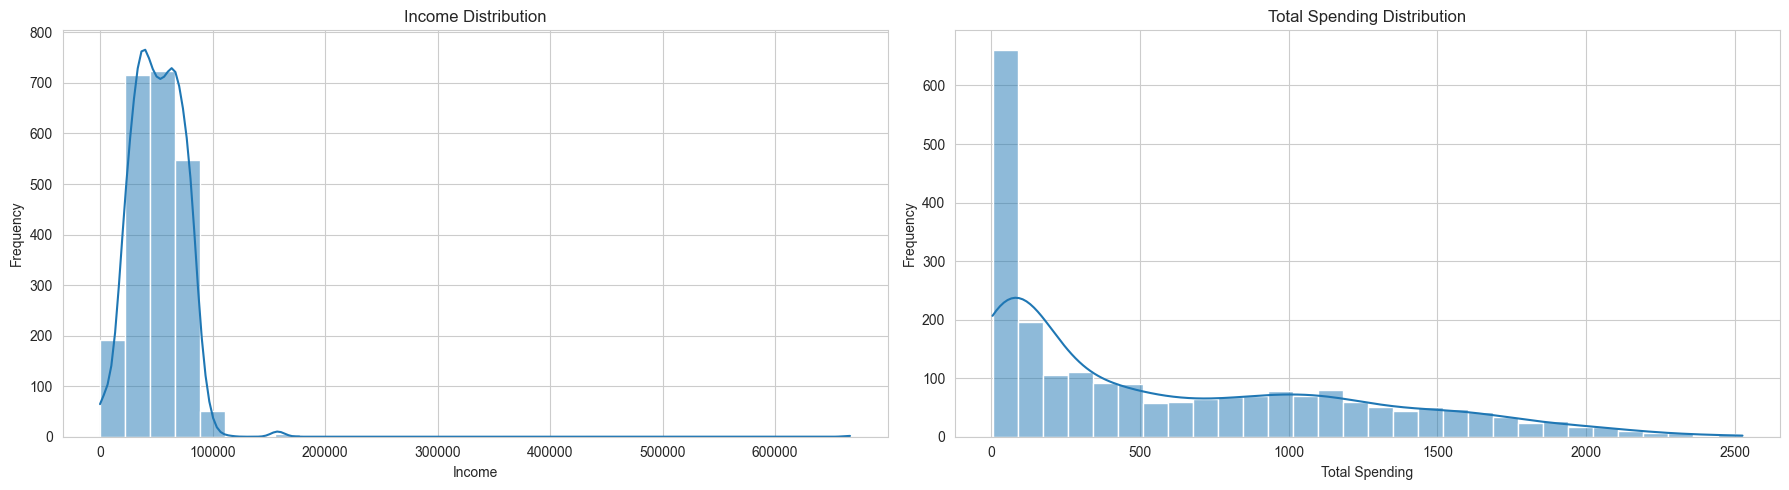

In [29]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for Income, TotalSpending, and Age
fig, ax = plt.subplots(1,2, figsize=(18, 5))

# Income Distribution
sns.histplot(df['Income'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Income Distribution')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Frequency')

# Total Spending Distribution
sns.histplot(df['TotalSpending'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Total Spending Distribution')
ax[1].set_xlabel('Total Spending')
ax[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

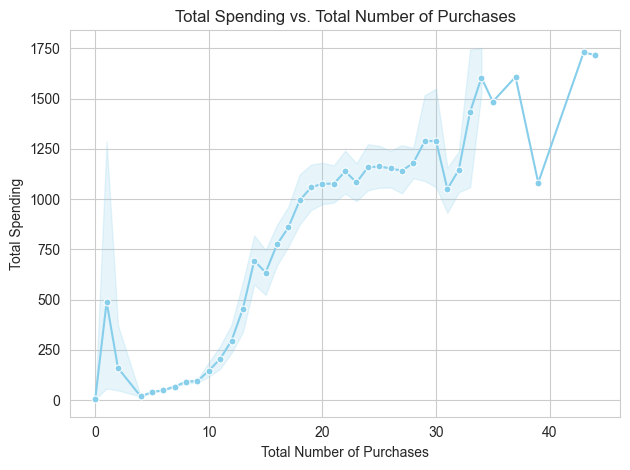

In [30]:
df[['TotalNumberOfPurchases', 'TotalSpending']].corr()
sns.lineplot(x='TotalNumberOfPurchases', y='TotalSpending', data=df, marker='o', markersize=5, color='skyblue')
plt.title('Total Spending vs. Total Number of Purchases')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()

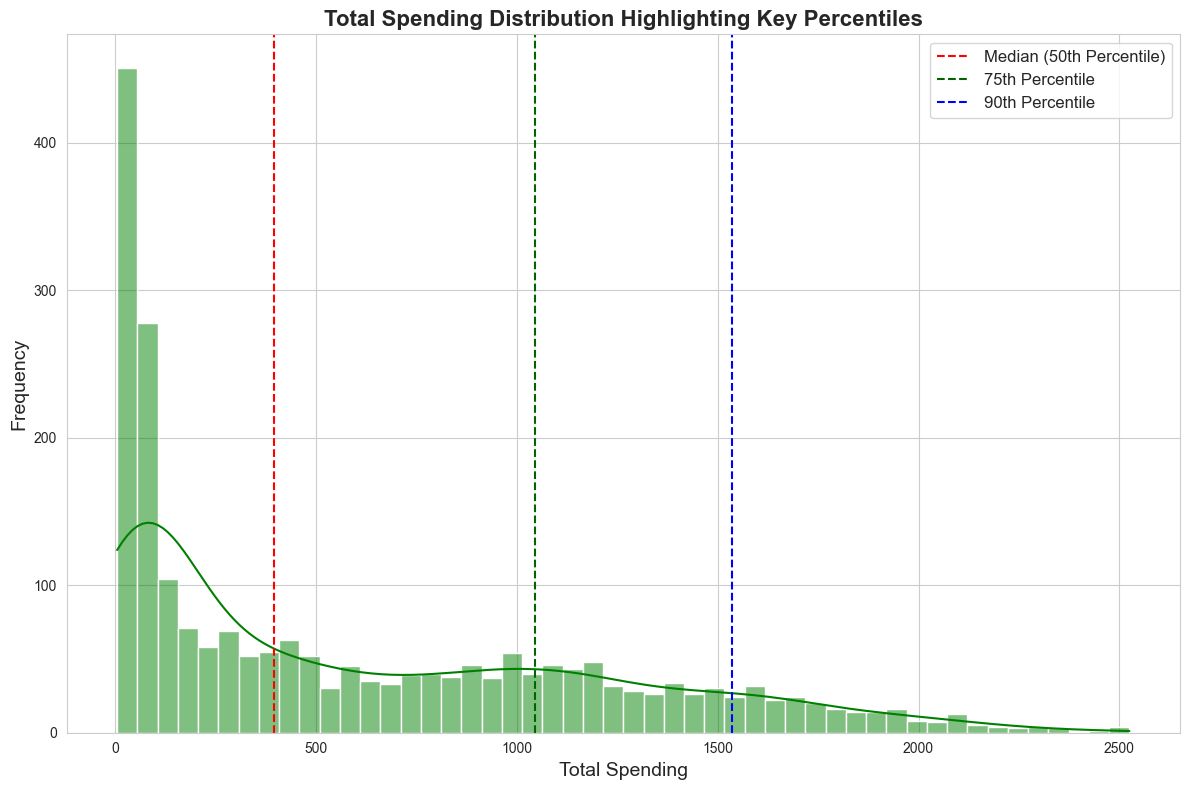

      TotalSpending
0.25           69.0
0.50          396.0
0.75         1045.0
0.90         1536.0
0.95         1767.2


In [31]:
# Calculate specific percentiles for Total Spending
total_spending_percentiles = df['TotalSpending'].quantile([0.25, 0.5, 0.75, 0.9, 0.95]).to_frame()

# Visualize the Total Spending distribution, emphasizing critical ranges
plt.figure(figsize=(12, 8))  # Slightly larger for better readability
sns.histplot(df['TotalSpending'], bins=50, kde=True, color='green')  # Softer color with transparency
plt.title('Total Spending Distribution Highlighting Key Percentiles', fontsize=16, fontweight='bold')
plt.axvline(df['TotalSpending'].quantile(0.5), color='red', linestyle='--', label='Median (50th Percentile)')
plt.axvline(df['TotalSpending'].quantile(0.75), color='darkgreen', linestyle='--', label='75th Percentile')
plt.axvline(df['TotalSpending'].quantile(0.9), color='blue', linestyle='--', label='90th Percentile')

plt.xlabel('Total Spending', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Display the calculated percentiles in a more readable format
print(total_spending_percentiles)

## Analysis of High Spenders

In [32]:
# Defining high-spending customers based on the 90th percentile threshold
# Define high spenders based on the 90th percentile of TotalSpending
high_spending_threshold = df['TotalSpending'].quantile(0.90)
high_spenders = df[df['TotalSpending'] >= high_spending_threshold]
rest_of_spenders = df[df['TotalSpending'] < high_spending_threshold]

# Analyzing the demographics and purchasing behaviors of the high-spending segment
high_spenders_90_descriptive_stats = high_spenders[['Income', 'Age', 'TotalSpending', 'NumberOfWebPurchases', 
                                                       'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].describe()

# Analyzing campaign responses
campaign_responses = ['AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 
                      'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign']
campaign_response_stats = high_spenders[campaign_responses].mean()
high_spenders_90_descriptive_stats, campaign_response_stats

(              Income         Age  TotalSpending  NumberOfWebPurchases  \
 count     225.000000  225.000000     225.000000            225.000000   
 mean    79104.697778   45.173333    1824.213333              5.266667   
 std     16434.230803   13.125126     228.830526              2.267787   
 min         0.000000   20.000000    1536.000000              0.000000   
 25%     72335.000000   35.000000    1638.000000              4.000000   
 50%     79930.000000   44.000000    1766.000000              5.000000   
 75%     84906.000000   56.000000    1957.000000              7.000000   
 max    160803.000000   73.000000    2525.000000             11.000000   
 
        NumberOfCatalogPurchases  NumberOfStorePurchases  
 count                225.000000              225.000000  
 mean                   6.435556                8.133333  
 std                    3.548966                2.992550  
 min                    0.000000                0.000000  
 25%                    5.000000     

In [33]:
# Education Levels
education_levels_high_spenders = high_spenders['Education'].value_counts(normalize=True) * 100

# Marital Status
marital_status_high_spenders = high_spenders['Marital_Status'].value_counts(normalize=True) * 100

education_levels_high_spenders, marital_status_high_spenders

(Graduation    50.222222
 PhD           25.333333
 Master             20.0
 2n Cycle       4.444444
 Name: Education, dtype: Float64,
 Married     35.111111
 Together    27.111111
 Single      24.000000
 Divorced     9.777778
 Widow        4.000000
 Name: Marital_Status, dtype: float64)

In [31]:
# Re-analyzing family composition specifically focusing on the number of children at home for high spenders vs. overall customer base
family_composition_overall = df[['NumberOfKidsAtHome', 'NumberOfTeensAtHome']].mean()
family_composition_high_spenders = high_spenders[['NumberOfKidsAtHome', 'NumberOfTeensAtHome']].mean()

# Comparing the family composition of high spenders to the overall customer base
family_composition_comparison = pd.DataFrame({
    'Overall Customer Base': family_composition_overall,
    'High Spenders': family_composition_high_spenders
})

family_composition_comparison


,Overall Customer Base,High Spenders
NumberOfKidsAtHome,0.444345,0.057778
NumberOfTeensAtHome,0.506482,0.155556


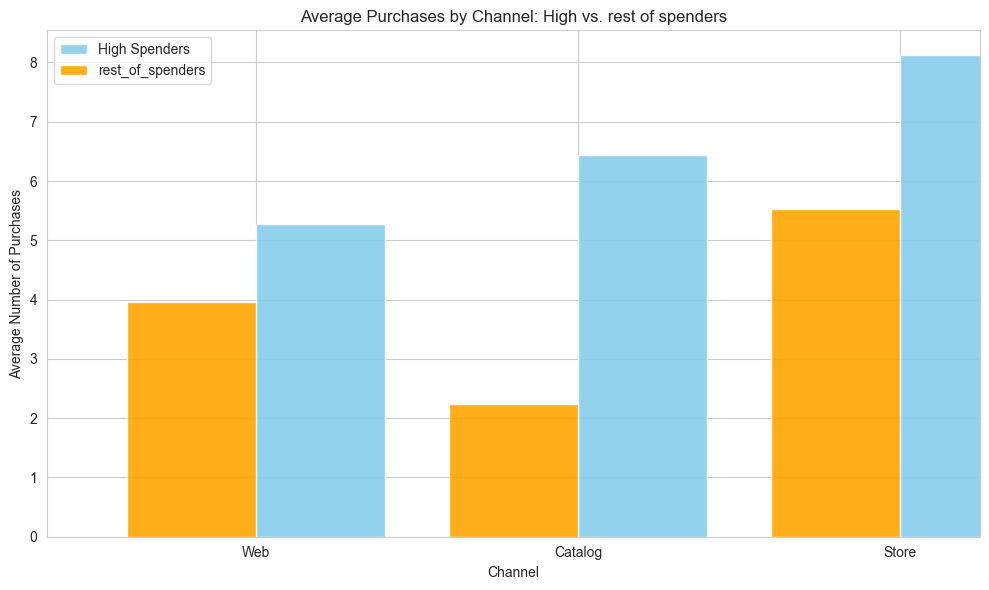

(NumberOfWebPurchases        5.266667
 NumberOfCatalogPurchases    6.435556
 NumberOfStorePurchases      8.133333
 dtype: float64,
 NumberOfWebPurchases        3.955268
 NumberOfCatalogPurchases    2.240557
 NumberOfStorePurchases      5.532803
 dtype: float64)

In [35]:
# Calculate average number of purchases through each channel for high and low spenders
avg_purchases_high = high_spenders[['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].mean()
avg_purchases_low = rest_of_spenders[['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].mean()

# Plotting the comparison
plt.figure(figsize=(10, 6))
avg_purchases_high.plot(kind='bar', color='skyblue', label='High Spenders', alpha=0.9, position=0, width=0.4)
avg_purchases_low.plot(kind='bar', color='orange', label='rest_of_spenders', alpha=0.9, position=1, width=0.4)
plt.title('Average Purchases by Channel: High vs. rest of spenders')
plt.xlabel('Channel')
plt.ylabel('Average Number of Purchases')
plt.xticks(ticks=[0, 1, 2], labels=['Web', 'Catalog', 'Store'], rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

(avg_purchases_high, avg_purchases_low)

<Figure size 1200x600 with 0 Axes>

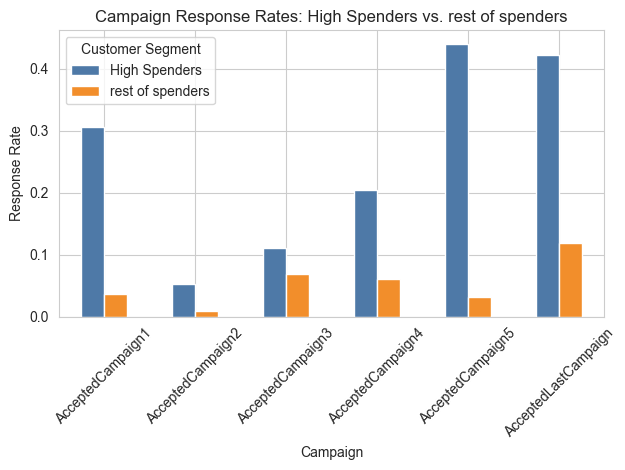

,High Spenders,rest of spenders
AcceptedCampaign1,0.306667,0.037276
AcceptedCampaign2,0.053333,0.008946
AcceptedCampaign3,0.111111,0.068588
AcceptedCampaign4,0.204444,0.060139
AcceptedCampaign5,0.440000,0.031312
AcceptedLastCampaign,0.422222,0.118787


In [36]:
campaign_columns = ['AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 
                    'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign']
campaign_engagement_high_spenders = high_spenders[campaign_columns].mean()
# Calculate average response rates to each campaign for low spenders
campaign_engagement_low_spenders = rest_of_spenders[campaign_columns].mean()

# Comparing campaign response rates between high spenders and low spenders
campaign_response_comparison = pd.DataFrame({
    'High Spenders': campaign_engagement_high_spenders,
    'rest of spenders': campaign_engagement_low_spenders
})

# Visualizing the comparison
plt.figure(figsize=(12, 6))
campaign_response_comparison.plot(kind='bar', color=['#4e79a7', '#f28e2b'])
plt.title('Campaign Response Rates: High Spenders vs. rest of spenders')
plt.xlabel('Campaign')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()

campaign_response_comparison


## Broader Demographic Analysis

In [37]:
# Analyzing broader demographic characteristics of the entire customer base
demographic_columns = ['Education', 'Marital_Status', 'NumberOfKidsAtHome', 'NumberOfTeensAtHome','TotalNumberOfChildren']
demographic_analysis = df[demographic_columns].describe(include='all')

# Analyzing the distribution of education levels and marital status
education_distribution = df['Education'].value_counts(normalize=True) * 100
marital_status_distribution = df['Marital_Status'].value_counts(normalize=True) * 100

demographic_analysis, education_distribution, marital_status_distribution


(         Education Marital_Status  NumberOfKidsAtHome  NumberOfTeensAtHome  \
 count         2237           2237         2237.000000          2237.000000   
 unique           5              8                 NaN                  NaN   
 top     Graduation        Married                 NaN                  NaN   
 freq          1127            864                 NaN                  NaN   
 mean           NaN            NaN            0.444345             0.506482   
 std            NaN            NaN            0.538467             0.544593   
 min            NaN            NaN            0.000000             0.000000   
 25%            NaN            NaN            0.000000             0.000000   
 50%            NaN            NaN            0.000000             0.000000   
 75%            NaN            NaN            1.000000             1.000000   
 max            NaN            NaN            2.000000             2.000000   
 
         TotalNumberOfChildren  
 count           

In [38]:

#demographic_analysis = high_spenders[demographic_columns].describe(include='all')

# Analyzing the distribution of education levels and marital status
education_distribution = high_spenders['Education'].value_counts(normalize=True) * 100
marital_status_distribution = high_spenders['Marital_Status'].value_counts(normalize=True) * 100
education_distribution, marital_status_distribution


(Graduation    50.222222
 PhD           25.333333
 Master             20.0
 2n Cycle       4.444444
 Name: Education, dtype: Float64,
 Married     35.111111
 Together    27.111111
 Single      24.000000
 Divorced     9.777778
 Widow        4.000000
 Name: Marital_Status, dtype: float64)

In [39]:
education_distribution = rest_of_spenders['Education'].value_counts(normalize=True) * 100
marital_status_distribution = rest_of_spenders['Marital_Status'].value_counts(normalize=True) * 100
education_distribution, marital_status_distribution

(Graduation    50.397614
 PhD           21.272366
 Master        16.153082
 2n Cycle       9.493042
 Basic          2.683897
 Name: Education, dtype: Float64,
 Married     39.015905
 Together    25.745527
 Single      21.123260
 Divorced    10.387674
 Widow        3.379722
 Alone        0.149105
 Absurd       0.099404
 YOLO         0.099404
 Name: Marital_Status, dtype: float64)

<AxesSubplot: xlabel='Age'>

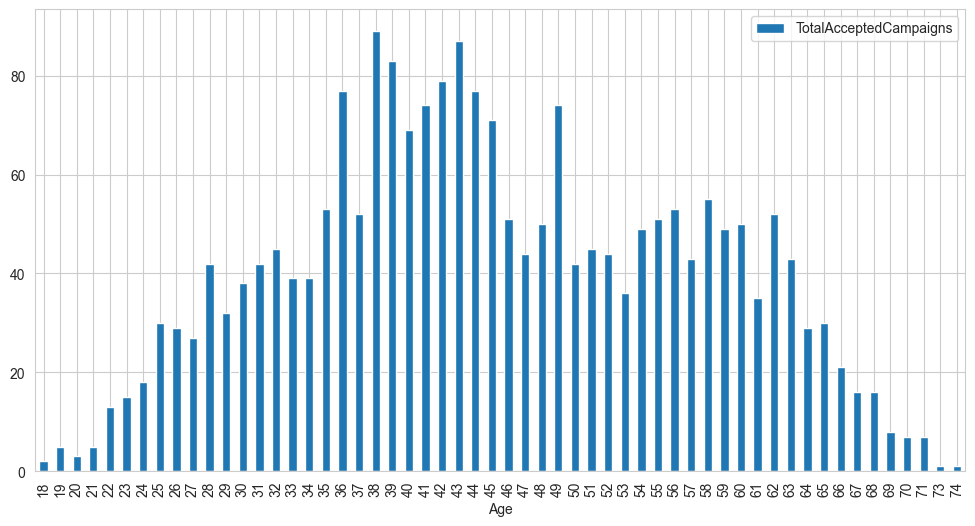

In [40]:
#print(df[['Age', 'TotalAcceptedCampaigns']].groupby('Age').agg(['count', 'mean','median']))

df[['Age', 'TotalAcceptedCampaigns']].groupby('Age').count().plot(kind='bar', figsize=(12, 6))

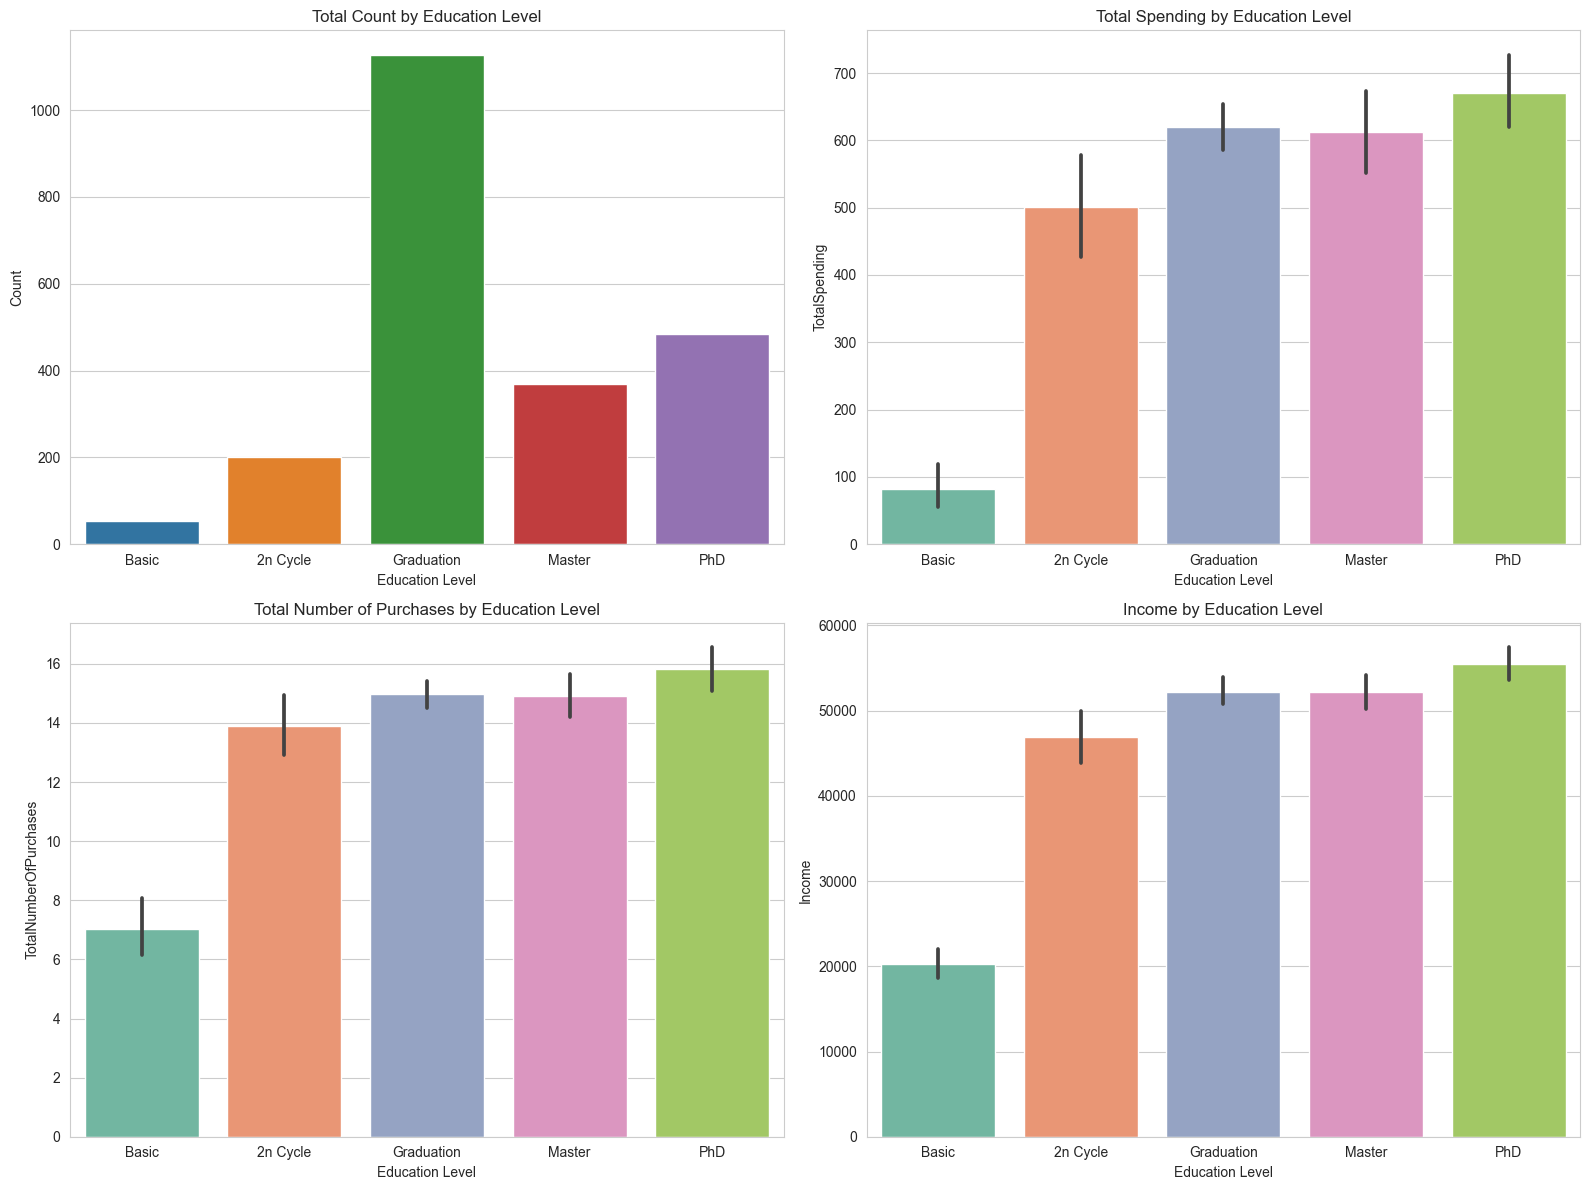

In [41]:
# Define the order of categories
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

# Define the metrics to plot
metrics = [
    ('count', 'Education', None, 'Total Count by Education Level'),
    ('bar', 'Education', 'TotalSpending', 'Total Spending by Education Level'),
    ('bar', 'Education', 'TotalNumberOfPurchases', 'Total Number of Purchases by Education Level'),
    ('bar', 'Education', 'Income', 'Income by Education Level')
]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()  # Flatten the axis array for easy indexing

# Loop through the metrics and create each plot
for i, (kind, x, y, title) in enumerate(metrics):
    ax = axes[i]
    if kind == 'count':
        sns.countplot(x=x, data=df, order=education_order, ax=ax)
    else:
        sns.barplot(x=x, y=y, data=df, palette='Set2', order=education_order, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Education Level')
    if y:
        ax.set_ylabel(y)
    else:
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


## Product category analysis

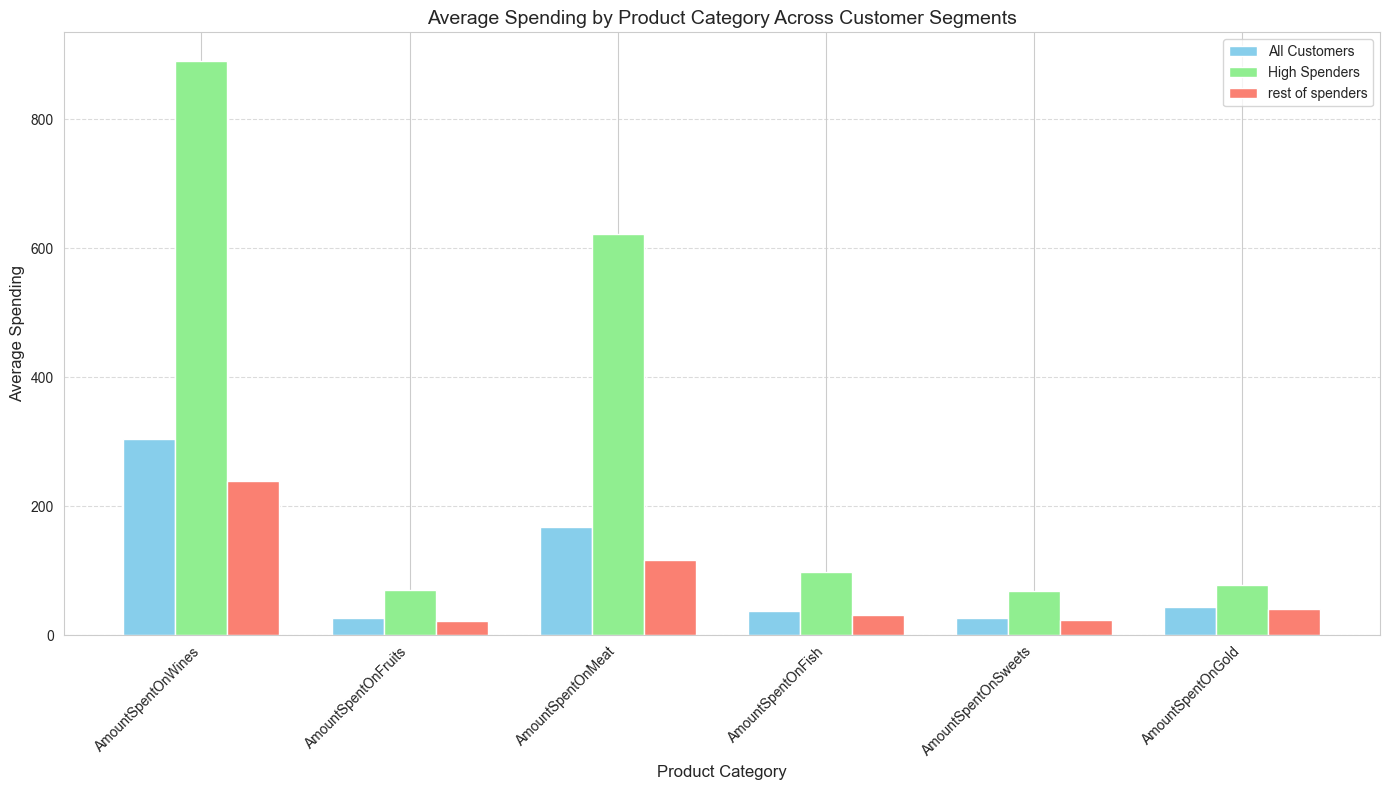

In [42]:
# Sample DataFrames for demonstration purposes (replace these with your actual DataFrames)
# df = pd.DataFrame(...)  # All customers
# high_spenders = pd.DataFrame(...)  # High spenders
# low_spenders = pd.DataFrame(...)  # Low spenders

product_categories = [
    'AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 
    'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold'
]

# Calculating average spending by category for each group
avg_spending_all = df[product_categories].mean()
avg_spending_high = high_spenders[product_categories].mean()
avg_spending_low = rest_of_spenders[product_categories].mean()

# Creating a consolidated DataFrame
avg_spending_df = pd.DataFrame({
    'All Customers': avg_spending_all,
    'High Spenders': avg_spending_high,
    'rest of spenders': avg_spending_low
})

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
positions = np.arange(len(product_categories))
bar_width = 0.25

# Plotting each group
ax.bar(positions - bar_width, avg_spending_df['All Customers'], bar_width, label='All Customers', color='skyblue')
ax.bar(positions, avg_spending_df['High Spenders'], bar_width, label='High Spenders', color='lightgreen')
ax.bar(positions + bar_width, avg_spending_df['rest of spenders'], bar_width, label='rest of spenders', color='salmon')

# Adding labels and title
ax.set_xlabel('Product Category', fontsize=12)
ax.set_ylabel('Average Spending', fontsize=12)
ax.set_title('Average Spending by Product Category Across Customer Segments', fontsize=14)
ax.set_xticks(positions)
ax.set_xticklabels(product_categories, rotation=45, ha='right')
ax.legend()

# Enhancing layout
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Purchase Frequency Analysis

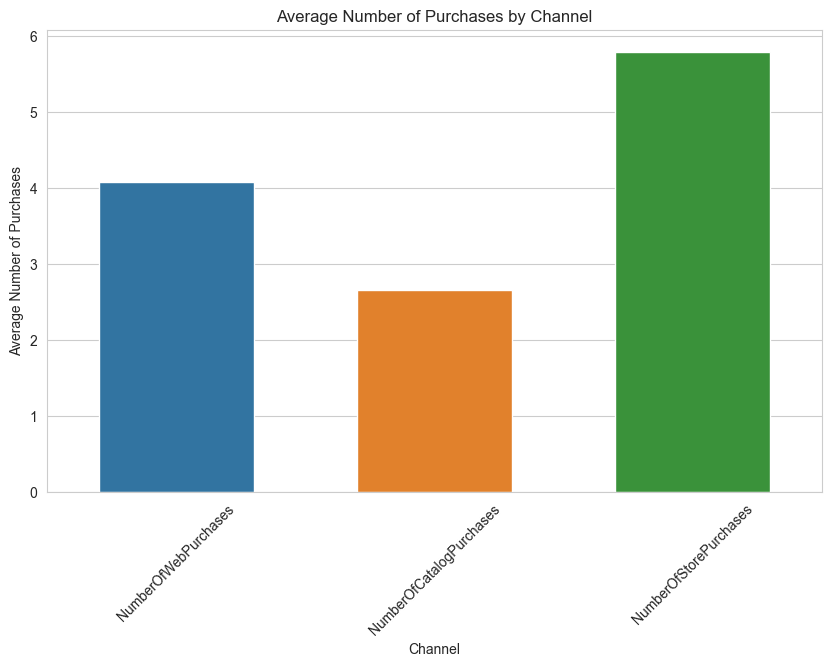

(count    2237.000000
 mean       14.870809
 std         7.676593
 min         0.000000
 25%         8.000000
 50%        15.000000
 75%        21.000000
 max        44.000000
 Name: TotalNumberOfPurchases, dtype: float64,
 NumberOfWebPurchases        4.087170
 NumberOfCatalogPurchases    2.662494
 NumberOfStorePurchases      5.794367
 dtype: float64)

In [43]:
#Analyze Purchase Frequency
purchase_frequency_stats = df['TotalNumberOfPurchases'].describe()

#Channel Preferences - Calculating and visualizing channel usage
channel_preferences = df[['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].mean()

# Visualizing channel preferences
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_preferences.index, y=channel_preferences.values,width=0.6)
plt.title('Average Number of Purchases by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=45)
plt.show()

purchase_frequency_stats, channel_preferences


In [44]:

# Identify variables related to purchasing methods
purchasing_columns = ['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases', 'TotalNumberOfPurchases']

# Calculate descriptive statistics for each purchasing method
descriptive_statistics_purchases = df[purchasing_columns].describe()

descriptive_statistics_purchases.loc[['mean', 'min', 'max'], :]

,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases
mean,4.08717,2.662494,5.794367,14.870809
min,0.00000,0.000000,0.000000,0.000000
max,27.00000,28.000000,13.000000,44.000000


In [45]:
#people with lower education are less likely to spend more money
#people with lower education are less likely to make more purchases
#but one of the potential reason is that the dataset countain less people with lower education

# CLUSTRING
## WOOHOO

## Importing necessary libraries

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [47]:
df.columns

Index(['CustomerID', 'BirthYear', 'Age', 'Education', 'Marital_Status',
       'Income', 'NumberOfKidsAtHome', 'NumberOfTeensAtHome',
       'TotalNumberOfChildren', 'EnrollmentDate', 'DaysSinceEnrollment',
       'Recency', 'HasComplained', 'AmountSpentOnWines', 'AmountSpentOnFruits',
       'AmountSpentOnMeat', 'AmountSpentOnFish', 'AmountSpentOnSweets',
       'AmountSpentOnGold', 'TotalSpending', 'NumberOfDealsPurchases',
       'NumberOfWebPurchases', 'NumberOfCatalogPurchases',
       'NumberOfStorePurchases', 'TotalNumberOfPurchases',
       'NumberOfWebVisitsPerMonth', 'AcceptedCampaign1', 'AcceptedCampaign2',
       'AcceptedCampaign3', 'AcceptedCampaign4', 'AcceptedCampaign5',
       'AcceptedLastCampaign', 'TotalAcceptedCampaigns'],
      dtype='object')

## Preprocessing

In [84]:
# Define categorical and numerical columns again due to the reset
categorical_cols = ['Education']
numerical_cols = df.select_dtypes(include=['int64']).columns.tolist()

# Remove non-numeric columns and columns not useful for clustering
non_numeric_cols = ['CustomerID', 'BirthYear', 'EnrollmentDate', 'Age', 
                    'TotalNumberOfChildren', 'DaysSinceEnrollment', 'HasComplained', 'Recency']

numerical_cols = [col for col in numerical_cols if col not in non_numeric_cols]
#numerical_cols = ['NumberOfKidsAtHome', 'NumberOfTeensAtHome', 'TotalSpending','AcceptedCampaign1',
                    #  'AcceptedCampaign2', 'AcceptedCampaign3', 'AcceptedCampaign4', 'AcceptedCampaign5',
                    #    'AcceptedLastCampaign','NumberOfDealsPurchases', 'NumberOfWebPurchases', 'NumberOfCatalogPurchases']
# Create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps into a single ColumnTransformer pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply the ColumnTransformer to our data
data_prepared = preprocessor.fit_transform(df)

# The result is a NumPy array. Let's convert it to a DataFrame for better readability
# Get feature names from onehot encoder
onehot_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
all_features = numerical_cols + onehot_features.tolist()

# Create a DataFrame with the transformed features
data_prepared_df = pd.DataFrame(data_prepared, columns=all_features)

data_prepared_df.head()

,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,x0_2n Cycle,x0_Basic,x0_Graduation,x0_Master,x0_PhD
0,0.252324,-0.825388,-0.930227,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,1.680649,0.348371,1.408080,2.510435,-0.552077,1.319785,0.692882,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,2.386966,0.620785,0.0,0.0,1.0,0.0,0.0
1,-0.208211,1.032151,0.906417,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,-0.961838,-0.169096,-1.110957,-0.568802,-1.167421,-1.155824,-0.131574,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,1.0,0.0,0.0
2,0.778499,-0.825388,-0.930227,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,0.282956,-0.686563,1.408080,-0.226664,1.293956,0.798604,-0.543802,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,1.0,0.0,0.0
3,-0.977384,1.032151,-0.930227,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,-0.918627,-0.169096,-0.751094,-0.910939,-0.552077,-0.895234,0.280654,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,1.0,0.0,0.0
4,0.258376,1.032151,-0.930227,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,-0.305371,1.383304,0.328493,0.115473,0.063267,0.538014,-0.131574,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,1.0


In [85]:
print(numerical_cols)

['Income', 'NumberOfKidsAtHome', 'NumberOfTeensAtHome', 'AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold', 'TotalSpending', 'NumberOfDealsPurchases', 'NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases', 'TotalNumberOfPurchases', 'NumberOfWebVisitsPerMonth', 'AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign', 'TotalAcceptedCampaigns']


In [86]:
#['Income', 'TotalNumberOfChildren', 'AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold', 'TotalSpending', 'NumberOfDealsPurchases', 'NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases', 'TotalNumberOfPurchases', 'NumberOfWebVisitsPerMonth', 'AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign', 'TotalAcceptedCampaigns']
#['Income', 'NumberOfKidsAtHome', 'NumberOfTeensAtHome', 'AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold', 'TotalSpending', 'NumberOfDealsPurchases', 'NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases', 'TotalNumberOfPurchases', 'NumberOfWebVisitsPerMonth', 'AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign', 'TotalAcceptedCampaigns']

## Applying the Elbow Method 

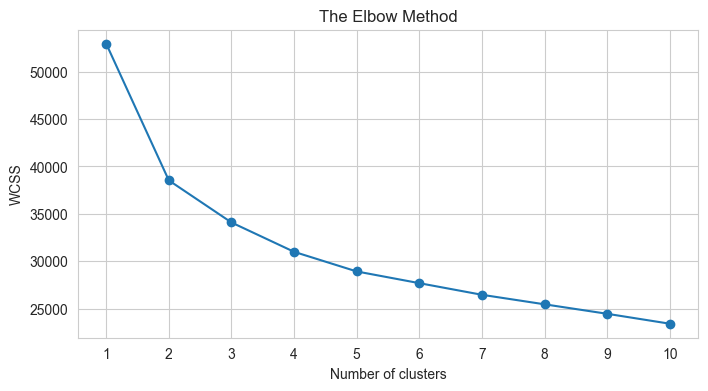

In [87]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=42)
    kmeans.fit(data_prepared_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


## Applying the silhouette score

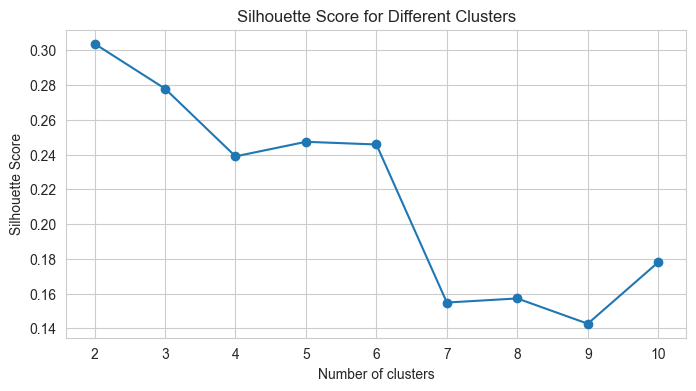

In [88]:
silhouette_scores = []
for k in range(2, 11):  # Silhouette Score is not defined for a single cluster
    kmeans = KMeans(n_clusters=k, init='k-means++',n_init=10, random_state=42)
    cluster_labels=kmeans.fit(data_prepared_df).labels_
    score = silhouette_score(data_prepared_df, cluster_labels)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, '-o')
plt.title('Silhouette Score for Different Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

## Applying k-means

### 2-clusters

In [189]:
# K-Means for 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
clusters_2 = kmeans_2.fit_predict(data_prepared_df)

# Add the cluster labels to your dataframe
df['Cluster_2'] = clusters_2


### 3-clusters

In [190]:
# K-Means for 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
clusters_3 = kmeans_3.fit_predict(data_prepared_df)

# Add the cluster labels to your dataframe
df['Cluster_3'] = clusters_3


In [191]:
# Analyze the clusters for 2-cluster solution
cluster_analysis_2 = df.groupby('Cluster_2').mean()

# Analyze the clusters for 3-cluster solution
cluster_analysis_3 = df.groupby('Cluster_3').mean()

C:/Users/USCS/AppData/Local/Temp/xpython_372/4290778911.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis_2 = df.groupby('Cluster_2').mean()
C:/Users/USCS/AppData/Local/Temp/xpython_372/4290778911.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis_3 = df.groupby('Cluster_3').mean()


In [192]:
# Silhouette score for 2 clusters
silhouette_avg_2 = silhouette_score(data_prepared_df, clusters_2)
print(f"The average silhouette score for 2 clusters is: {silhouette_avg_2}")

# Silhouette score for 3 clusters
silhouette_avg_3 = silhouette_score(data_prepared_df, clusters_3)
print(f"The average silhouette score for 3 clusters is: {silhouette_avg_3}")

The average silhouette score for 2 clusters is: 0.32081939617173943
The average silhouette score for 3 clusters is: 0.29978647323476826


In [193]:
cluster_analysis_2.sort_values(by='TotalSpending', ascending=False)

,BirthYear,Age,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,DaysSinceEnrollment,Recency,HasComplained,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,Cluster_3
Cluster_2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1967.212458,46.787542,71401.895439,0.081201,0.428254,0.509455,379.590656,49.501669,0.007786,609.559511,55.429366,360.363737,78.678532,57.413793,75.822024,1237.266963,2.081201,5.822024,5.318131,8.575083,21.796440,3.759733,0.152392,0.031146,0.084538,0.140156,0.1802,0.234705,0.823137,1.773081
1,1970.036622,43.963378,38422.459641,0.688341,0.559043,1.247384,336.455157,48.837818,0.009716,98.687593,6.678625,36.940209,9.870703,6.680120,22.566517,181.423767,2.491779,2.921525,0.878176,3.926009,10.217489,6.366966,0.005232,0.001495,0.065022,0.030643,0.0000,0.091928,0.194320,0.145740


In [194]:
cluster_analysis_3.sort_values(by='TotalSpending', ascending=False)

,BirthYear,Age,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,DaysSinceEnrollment,Recency,HasComplained,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,Cluster_2
Cluster_3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1969.297561,44.702439,79236.634146,0.048780,0.175610,0.224390,359.887805,47.590244,0.004878,852.443902,55.219512,456.746341,79.385366,63.243902,75.487805,1582.526829,1.234146,5.512195,5.960976,8.185366,20.892683,3.302439,0.507317,0.136585,0.165854,0.400000,0.765854,0.604878,2.580488,0.014634
2,1966.539141,47.460859,67667.167929,0.119949,0.545455,0.665404,382.340909,49.672980,0.007576,515.906566,50.926768,302.141414,72.147727,51.162879,73.425505,1065.710859,2.540404,5.952020,4.785354,8.551768,21.829545,4.108586,0.045455,0.000000,0.058081,0.066919,0.006313,0.117424,0.294192,0.121212
0,1970.345161,43.654839,36906.167742,0.716935,0.536290,1.253226,334.546774,48.991935,0.010484,77.975000,5.736290,32.632258,8.487097,5.699194,19.943548,150.473387,2.370968,2.660484,0.761290,3.637903,9.430645,6.425806,0.003226,0.001613,0.066935,0.025806,0.000000,0.094355,0.191935,0.999194


## Hierarchical Clustering: Agglomerative Clustering

In [195]:
data_prepared_df

,Income,TotalNumberOfChildren,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,x0_Absurd,x0_Alone,x0_Divorced,x0_Married,x0_Single,x0_Together,x0_Widow,x0_YOLO
0,0.252324,-1.264618,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,1.680649,0.348371,1.408080,2.510435,-0.552077,1.319785,0.692882,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,2.386966,0.620785,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.208211,1.395420,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,-0.961838,-0.169096,-1.110957,-0.568802,-1.167421,-1.155824,-0.131574,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.778499,-1.264618,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,0.282956,-0.686563,1.408080,-0.226664,1.293956,0.798604,-0.543802,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.977384,0.065401,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,-0.918627,-0.169096,-0.751094,-0.910939,-0.552077,-0.895234,0.280654,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.258376,0.065401,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,-0.305371,1.383304,0.328493,0.115473,0.063267,0.538014,-0.131574,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.372788,0.065401,1.203582,0.421324,0.066855,0.081954,2.202538,3.901246,1.221953,-0.169096,1.767943,0.115473,-0.552077,0.407719,-0.131574,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2233,0.481772,2.725440,0.303134,-0.661606,-0.606872,-0.686886,-0.655663,-0.691139,-0.268808,2.418238,1.408080,-0.226664,-0.244405,0.928900,0.692882,3.812443,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,0.620785,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2234,0.207145,-1.264618,1.794966,0.547246,0.221989,-0.101103,-0.364998,-0.383699,1.055759,-0.686563,-0.751094,0.115473,2.216972,0.538014,0.280654,-0.262299,-0.11659,-0.280343,3.520683,-0.279414,-0.418942,0.620785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2235,0.686033,0.065401,0.368513,0.093927,0.208692,0.777572,0.070999,0.327256,0.394307,-0.169096,0.688356,0.799748,1.293956,1.059195,-0.956029,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
